In [86]:
import pandas as pd

In [88]:
#load data
df = pd.read_csv(r'C:\Users\lenovo\Downloads\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
#convert totalcharges into numeric,coercing error to naN
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors='coerce')
# check missincg values in TotalCharge
print(df['TotalCharges'].isnull().sum())

#fill missing TotalCharge with median or 0(or drop the few rows)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


11


In [21]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
df.drop('customerID', axis=1, inplace=True)

In [27]:
#convert categorial variable binary caode yes/no
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [29]:
#handle other categorial variables
df = pd.get_dummies(df, drop_first=True)



In [31]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [33]:
# exploratory data analysis(which will help to understand the trend,patterns and relationship in data)

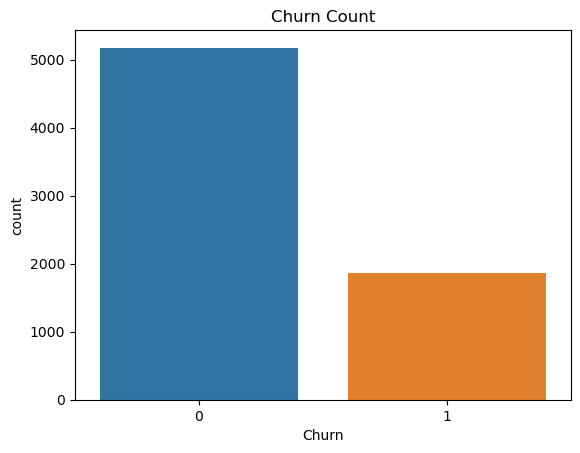

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [35]:
#Check Churn Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

#or use percentage
churn_rate = df['Churn'].value_counts(normalize=True)*100
print(churn_rate)

In [37]:
#Numerical features Vs Churn

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


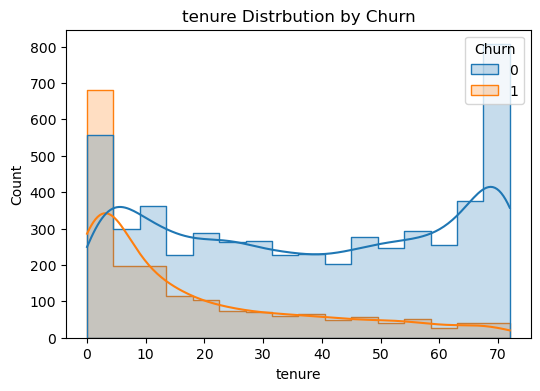

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


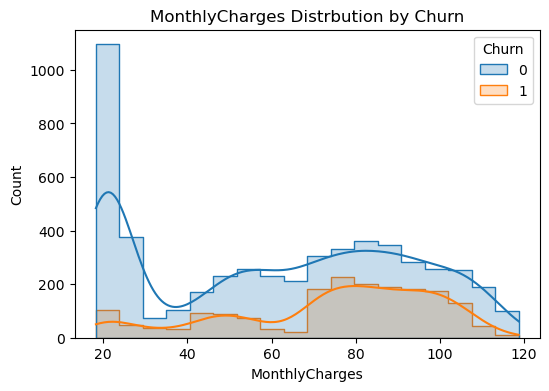

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


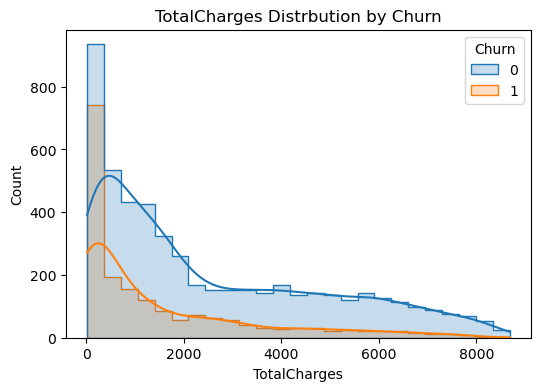

In [43]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, element="step")
    plt.title(f'{col} Distrbution by Churn')
    plt.show()
    import numpy as np

# Replace inf/-inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optional: fill or drop NaNs after that
df.dropna(inplace=True)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [45]:
#categorial features vs Churn

In [49]:
print(df.columns.tolist())

['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [51]:
categorical = ['Contract_One year', 'Contract_Two year',
               'InternetService_Fiber optic', 'PaymentMethod_Electronic check']

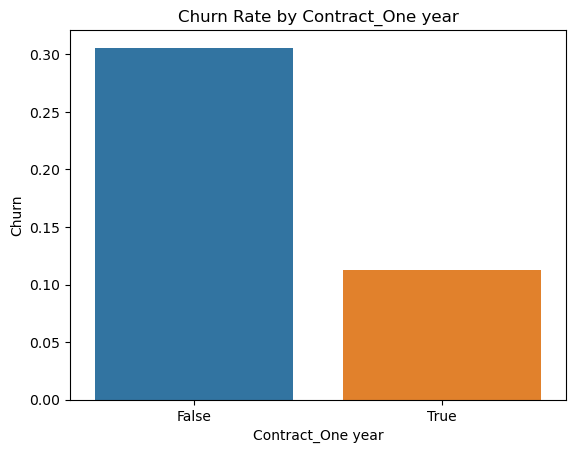

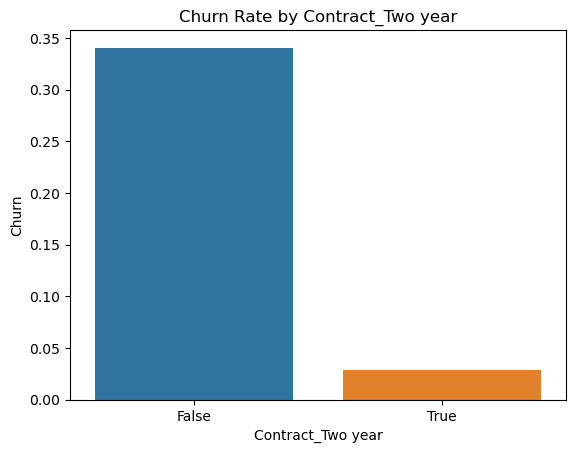

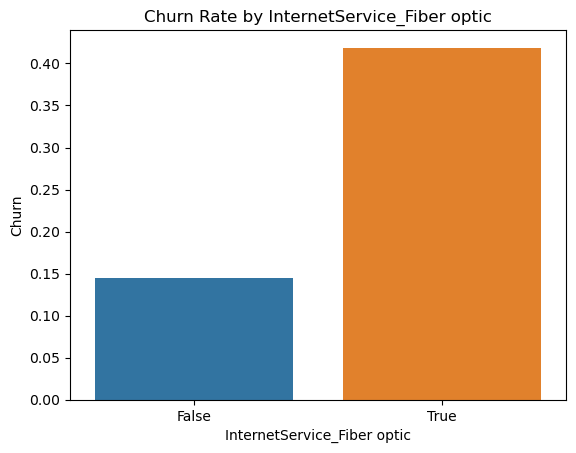

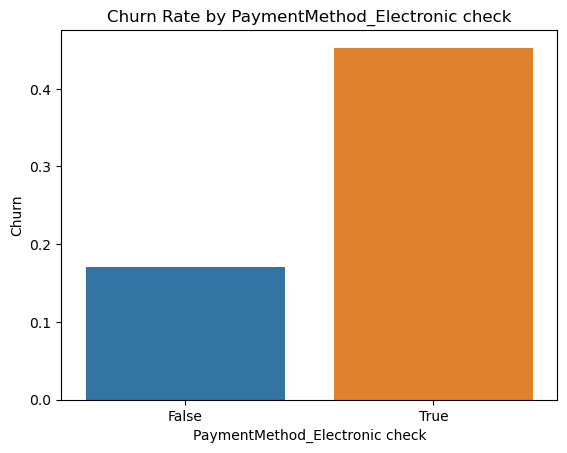

In [53]:
categorical = ['Contract_One year', 'Contract_Two year',
               'InternetService_Fiber optic', 'PaymentMethod_Electronic check']

for col in categorical:
    churn_by_category = df.groupby(col)['Churn'].mean().reset_index()
    sns.barplot(x=col, y='Churn', data=churn_by_category)
    plt.title(f'Churn Rate by {col}')
    plt.show()

In [55]:
#visualize coorealtion between features and Churn

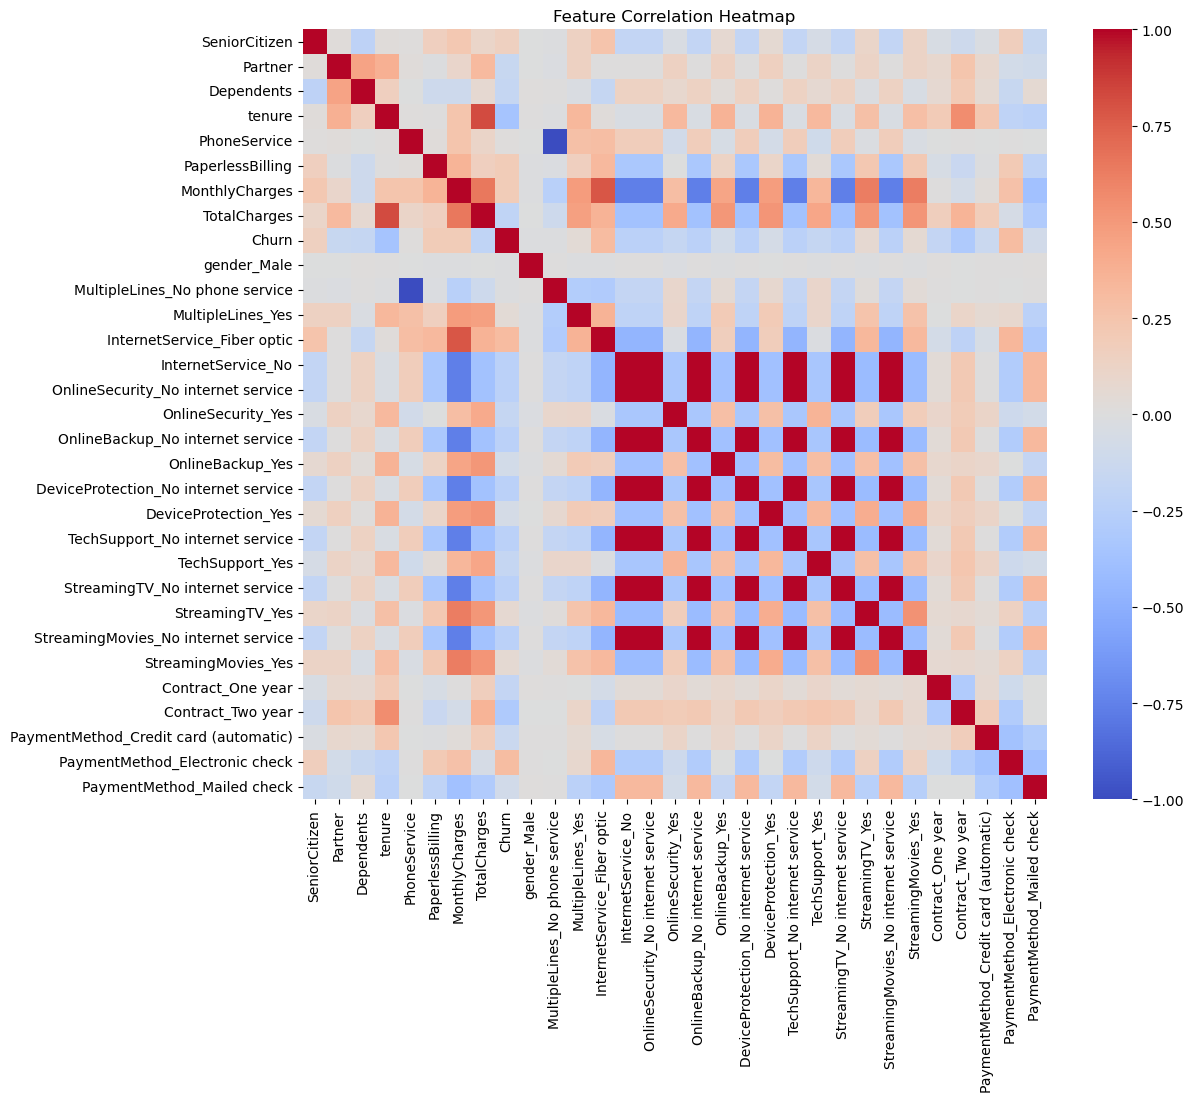

In [57]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [62]:
df.to_csv('cleaned_telco.csv', index=False)


In [64]:
# build a Churn Prediction Model

In [67]:
#prequisites import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#Split the Data
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
#Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluation
print("🔍 Logistic Regression")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔍 Logistic Regression
[[935 101]
 [155 218]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [73]:
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🌲 Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🌲 Random Forest
[[948  88]
 [195 178]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [75]:
#Compare Accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Logistic Regression Accuracy: 0.82
Random Forest Accuracy: 0.80


In [77]:
#if accuracy of random forest is better(usually does) then u can use it for final report

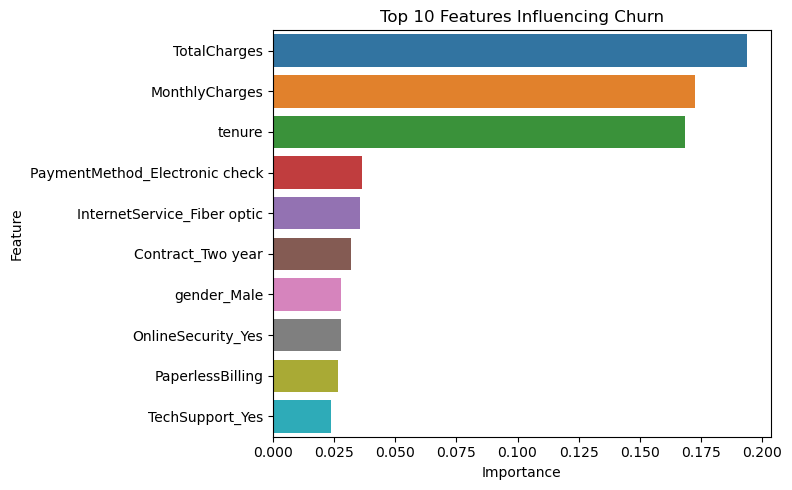

In [79]:
import pandas as pd
import numpy as np

# Get top features
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [84]:
#insights

#| Feature                          | Interpretation                            | Actionable Insight                     |
#| -------------------------------- | ----------------------------------------- | -------------------------------------- |
#| `Contract_Two year`              | Long-term contract lowers churn           | Offer incentives for 2-year plans      |
#| `InternetService_Fiber optic`    | Fiber users churn more                    | Improve service or offer loyalty perks |
#| `tenure`                         | New users churn more often                | Provide onboarding benefits            |
#| `PaymentMethod_Electronic check` | This payment method leads to higher churn | Recommend auto-pay or card options     |
